<a href="https://colab.research.google.com/github/passer87/aidata/blob/main/KNN%E5%88%86%E9%A1%9E%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

準確率: 0.7555555555555555


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37002 (\N{CJK UNIFIED IDEOGRAPH-908A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

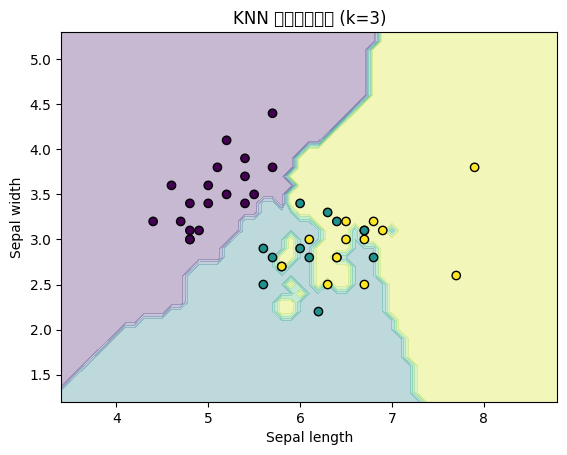

In [1]:
#KNN分類器
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 加載Iris數據集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 取前兩個特徵
y = iris.target

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 訓練KNN分類器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 預測
y_pred = knn.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"準確率: {accuracy}")

# 繪製分類結果
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test, y_test, knn, "KNN 分類決策邊界 (k=3)")

使用KD樹加速的KNN準確率: 0.7555555555555555


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27193 (\N{CJK UNIFIED IDEOGRAPH-6A39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

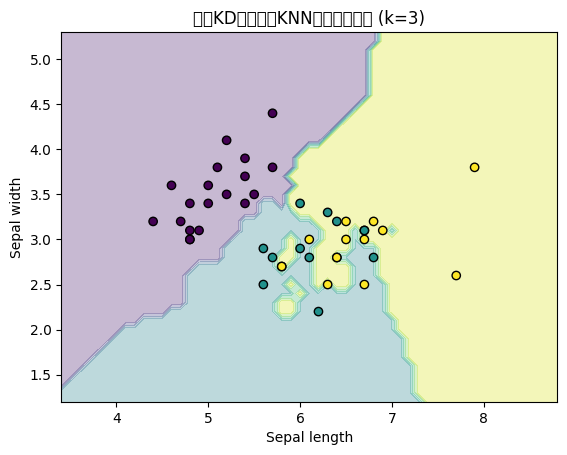

In [2]:
#KD樹加速KNN演算法
from sklearn.neighbors import KDTree

# 建立KD樹
kd_tree = KDTree(X_train)

# 使用KD樹進行KNN搜索
def knn_kd_tree(kd_tree, X_train, X_test, k):
    y_pred = []
    for x in X_test:
        dist, ind = kd_tree.query([x], k=k)
        neighbor_labels = y_train[ind[0]]
        unique, counts = np.unique(neighbor_labels, return_counts=True)
        y_pred.append(unique[np.argmax(counts)])
    return np.array(y_pred)

# 預測
y_pred_kd_tree = knn_kd_tree(kd_tree, X_train, X_test, k=3)

# 計算準確率
accuracy_kd_tree = accuracy_score(y_test, y_pred_kd_tree)
print(f"使用KD樹加速的KNN準確率: {accuracy_kd_tree}")

# 繪製分類結果
plot_decision_boundary(X_test, y_test, knn, "使用KD樹加速的KNN分類決策邊界 (k=3)")